In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import fitsio 
from astropy.table import Table, join, Column
from astropy.stats import LombScargle

from scipy.signal import savgol_filter

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [2]:
ls ../reduced/

README.md                c18/                     halo_commands_c16.txt*
Spica_halo_lc_o1.fits    c4/                      halo_commands_c17.txt*
c101/                    c6/                      halo_commands_c18.txt*
c102/                    c7/                      halo_commands_c4.txt*
c111/                    c8/                      halo_commands_c6.txt*
c112/                    halo_all.txt*            halo_commands_c7.txt*
c12/                     halo_commands_c10.txt*   halo_commands_c8.txt*
c13/                     halo_commands_c11.txt*   halo_commands_c9.txt*
c14/                     halo_commands_c12.txt*   halo_commands_clip.txt*
c15/                     halo_commands_c13.txt*   sbatch_halo_all.sbatch
c16/                     halo_commands_c14.txt*   sbatch_halo_all.txt
c17/                     halo_commands_c15.txt*   sbatch_halo_clip.sbatch


In [27]:
fname = '../reduced/Ascellahalo_lc_o1.fits'
data = Table.read(fname)
m = np.isfinite(data['corr_flux'])*(data['quality']==0)
data = data[m]
print(data.keys())

['time', 'cadence', 'x', 'y', 'quality', 'corr_flux']


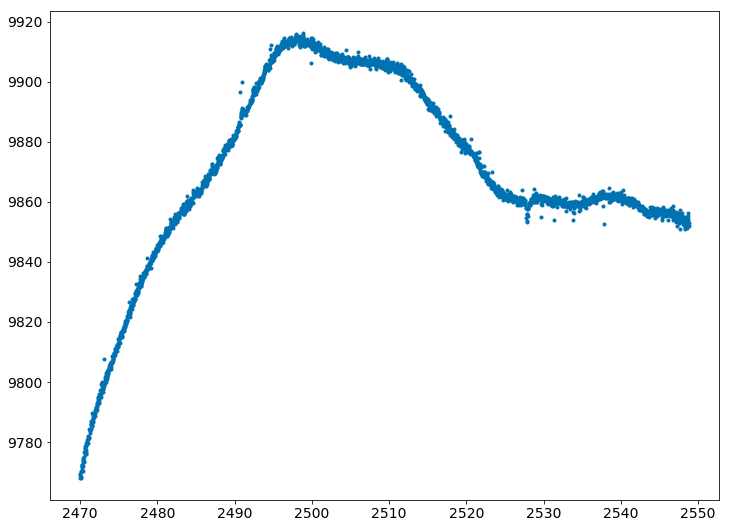

In [16]:
plt.plot(data['time'],data['corr_flux'],'.')

In [34]:
scf = savgol_filter(data['corr_flux'],201,1)
smooth = data['corr_flux']-scf+np.nanmedian(scf)
smooth /= np.nanmedian(smooth)

/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


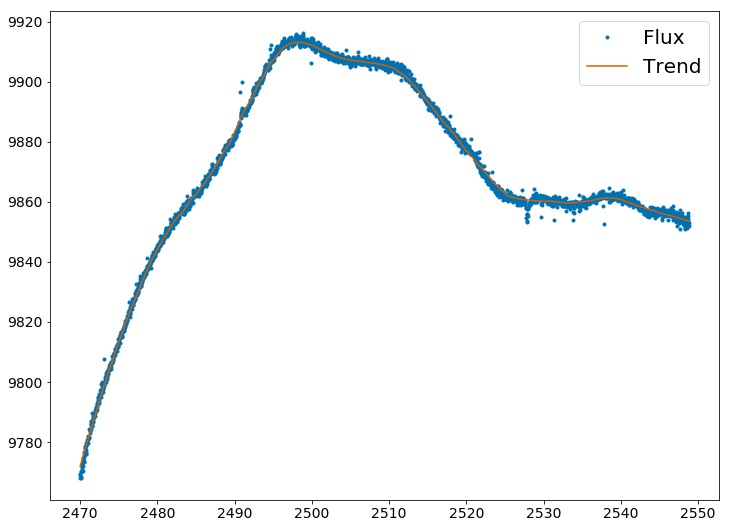

In [112]:
plt.plot(data['time'],data['corr_flux'],'.')
plt.plot(data['time'],scf,'-',color=colours[2])
plt.legend(labels=['Flux','Trend'])

Text(0.5, 1.01, 'Ascella Light Curve')

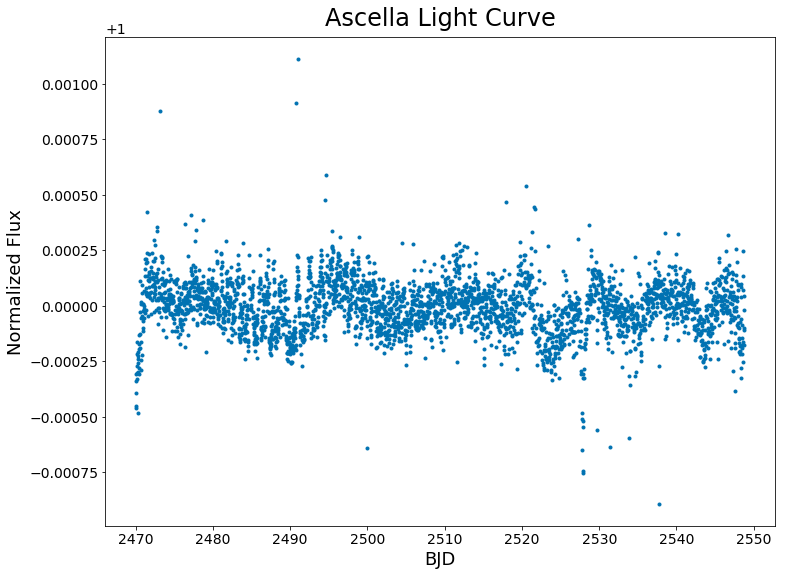

In [43]:
plt.plot(data['time'],smooth,'.')
plt.xlabel('BJD')
plt.ylabel('Normalized Flux')
plt.title('Ascella Light Curve',y=1.01)

In [38]:
ls = LombScargle(data['time'],smooth,smooth/1.e4)

In [73]:
min_p, max_p = 1./24., 20.
frequency, power = ls.autopower(minimum_frequency=1./max_p,maximum_frequency=1./min_p,samples_per_peak=5)
spower = savgol_filter(power,51,1)

/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


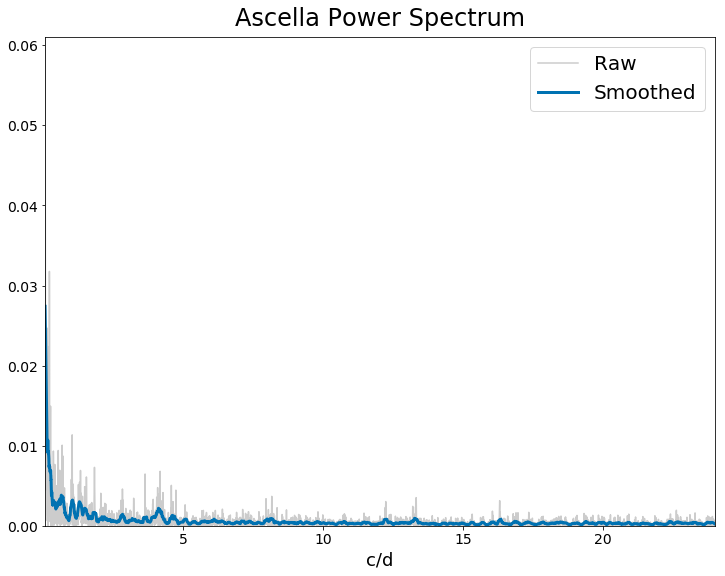

In [74]:
plt.plot(frequency,power,'0.8',label='Raw')
plt.plot(frequency,spower,linewidth=3.0,label='Smoothed')

plt.xlim(1./max_p,1./min_p)
plt.xlabel('c/d')
plt.ylim(0,np.max(power));
plt.title('Ascella Power Spectrum',y=1.01)
plt.legend();

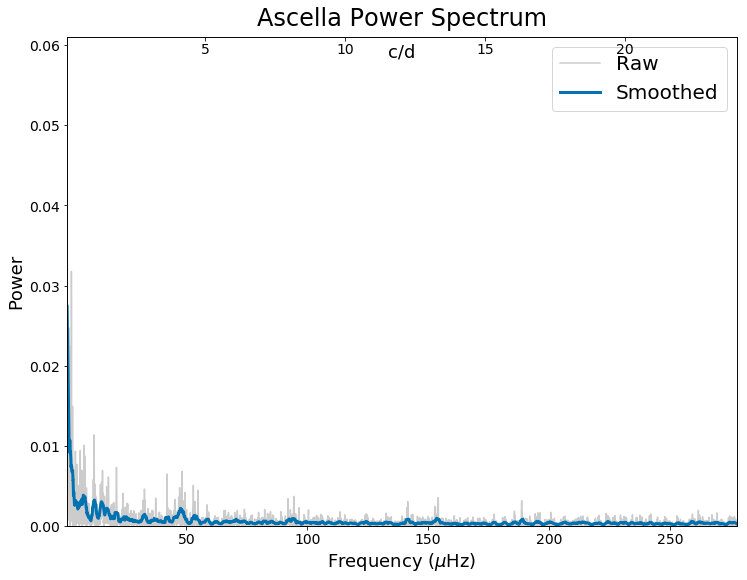

In [89]:

fig = plt.figure()
ax1 = plt.axes()

ax1.plot(frequency*11.57,power,'0.8',label='Raw')
ax1.plot(frequency*11.57,spower,linewidth=3.0,label='Smoothed')
ax1.set_xlim(1./max_p*11.57,1./min_p*11.57)
ax1.set_xlabel(r'Frequency ($\mu$Hz)')
ax1.set_ylabel(r'Power')

ax2 = ax1.twiny()
ax2.tick_params(axis="x",direction="in", pad=-20)

ax2.set_xlim(1./max_p,1./min_p)
ax2.set_xlabel('c/d',labelpad=-20)

plt.ylim(0,np.max(power));
plt.title('Ascella Power Spectrum',y=1.01)
ax1.legend();

Text(0.5, 1.01, 'Ascella Power Spectrum')

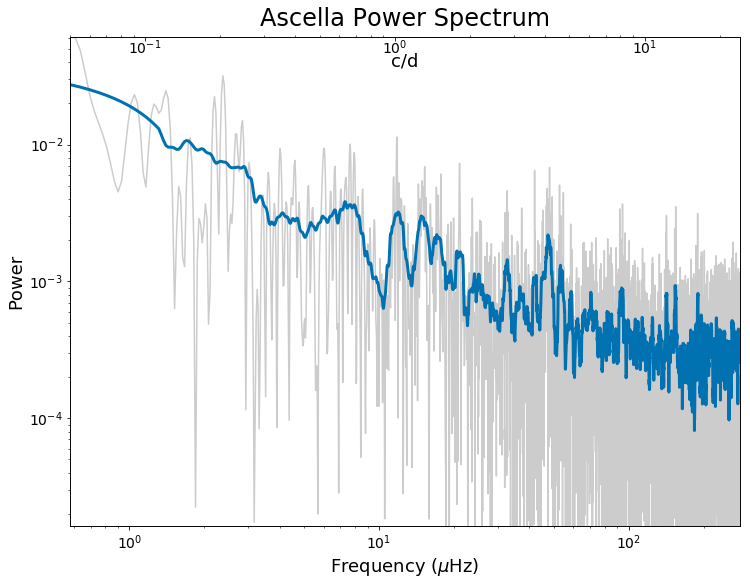

In [97]:

fig, ax1 = plt.subplots()

ax1.plot(frequency*11.57,power,'0.8',label='Raw')
ax1.plot(frequency*11.57,spower,linewidth=3.0,label='Smoothed')
ax1.set_xlim(1./max_p*11.57,1./min_p*11.57)


ax1.set_xlabel(r'Frequency ($\mu$Hz)')
ax1.set_ylabel(r'Power')

ax2 = ax1.twiny()

ax2.set_xlim(1./max_p,1./min_p)
ax2.set_xlabel('c/d',labelpad=-35)
ax2.tick_params(axis="x",direction="in", pad=-20)
ax1.set_xscale('log')
ax2.set_xscale('log')
plt.yscale('log')

plt.ylim(np.min(spower)/5.,np.max(power));
plt.title('Ascella Power Spectrum',y=1.01)


In [102]:
def plot_log_pgram(ax1,frequency,power,spower,name,min_p=1./24.,max_p=20.):

    ax1.plot(frequency*11.57,power,'0.8',label='Raw')
    ax1.plot(frequency*11.57,spower,linewidth=3.0,label='Smoothed')
    ax1.set_xlim(1./max_p*11.57,1./min_p*11.57)
    ax1.set_xlabel(r'Frequency ($\mu$Hz)')
    ax1.set_ylabel(r'Power (ppm$^2/{\mu}Hz)$')

    ax2 = ax1.twiny()
    ax2.tick_params(axis="x",direction="in", pad=-20)

    ax2.set_xlim(1./max_p,1./min_p)
    ax2.set_xlabel('c/d',labelpad=-35)

    plt.ylim(np.min(spower),np.max(power))
    ax1.set_xscale('log')
    ax2.set_xscale('log')

    plt.yscale('log')
    plt.title(r'%s Power Spectrum' % name,y=1.01)
    ax1.legend()



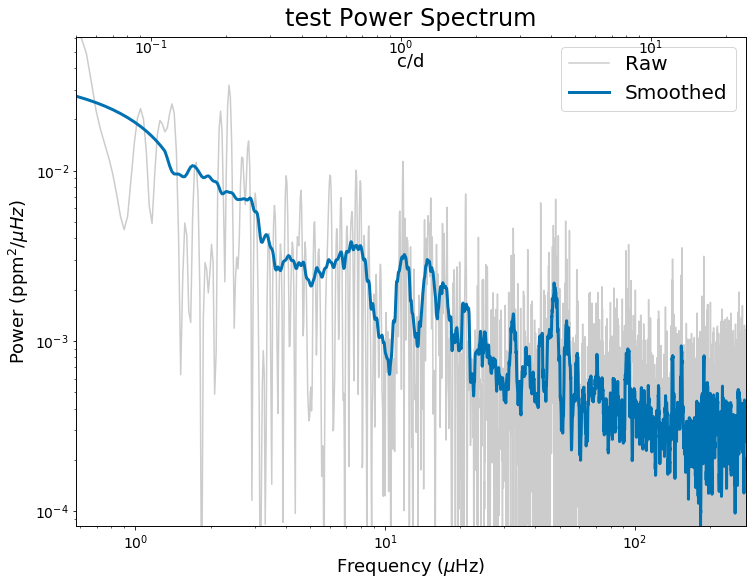

In [103]:
fig = plt.figure()
ax1 = plt.axes()

plot_log_pgram(ax1,frequency,power,spower,'test')

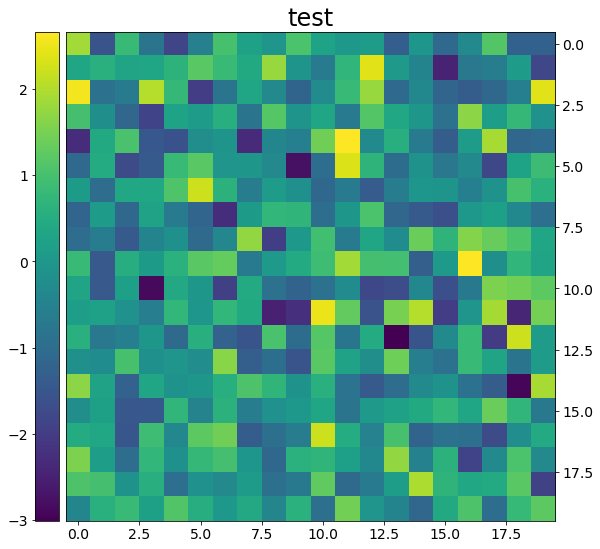

In [124]:
fig = plt.figure()
ax1 = plt.axes()
pic = ax1.imshow(np.random.randn(20,20))
plt.title('test')
cbaraxes, kw = mpl.colorbar.make_axes(ax1,location='left',pad=0.01)

plt.colorbar(pic,cax=cbaraxes)
cbaraxes.yaxis.set_ticks_position('left')
ax1.yaxis.set_ticks_position('right')


In [125]:
def plot_all(newts,image,weightmap,save_file=None,formal_name='test'):
    min_p,max_p=1./24.,20.
    PW,PH = 8.27, 11.69
    
    frequency, power, spower = get_pgram(newts['time'],newts['whitened'],min_p=min_p,max_p=max_p)
    
    rc('axes', labelsize=7, titlesize=8)
    rc('font', size=6)
    rc('xtick', labelsize=7)
    rc('ytick', labelsize=7)
    rc('lines', linewidth=1)
    fig = plt.figure(figsize=(PW,PH))
    gs = GridSpec(4,2)
    gs.update(top=0.98, bottom = 2/3.*1.03,hspace=0.07,left=0.07,right=0.96)
    
    ax_lctime = subplot(gs[0,:])
    ax_lcwhite = subplot(gs[1,:],sharex=ax_lctime)
    ax_fluxmap = subplot(gs[2,1])
    ax_weightmap = subplot(gs[2,2])
    ax_periodogram   = subplot(gs[3,:])
    ax_logpgram    = subplot(gs[4,:],sharex=ax_periodogram)
    axes = [ax_lctime,ax_lcpos,ax_lcwhite, ax_lcfold, ax_lnlike, ax_lcoe[0], ax_lcoe[1], ax_sde, ax_transits, ax_info, ax_ec]

    plot_lc(ax_lctime,ts['time'],ts['corr_flux'],formal_name,trend=ts['trend'])
    plot_lc(ax_lcwhite,ts['time'],ts['whitened'],formal_name+': Whitened')
    plot_weightmap(ax_weightmap,weightmap,formal_name)
    plot_fluxmap(ax_fluxmap,image,formal_name)
    plot_pgram(ax_periodogram,frequency,power,spower,formal_name)        
    plot_log_pgram(ax_logpgram,frequency,power,spower,formal_name)        

    if save_file is not None:
        plt.savefig(save_file)


In [126]:
data['trend'] = scf
data['whitened'] = smooth

['time', 'cadence', 'x', 'y', 'quality', 'corr_flux']

Text(0.5, 1.0, 'Light Curve: Halo (top), Filtered (bottom)')

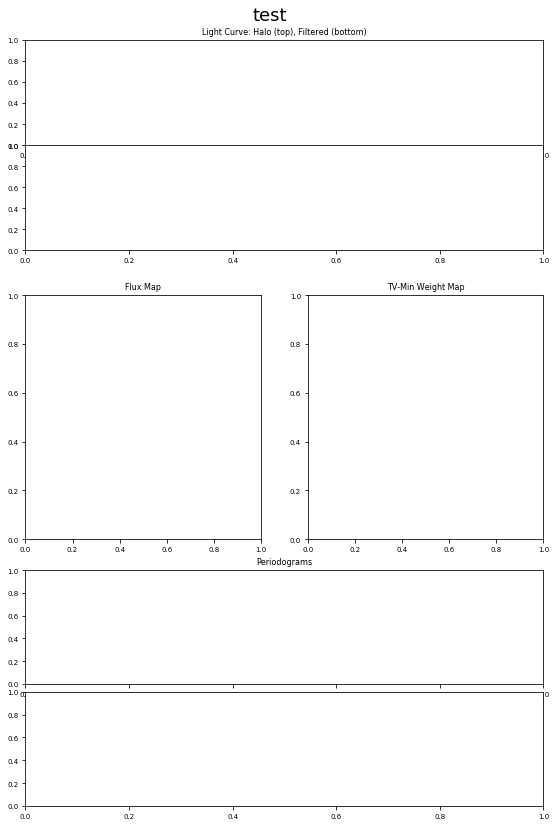

In [150]:
from matplotlib import rc
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import figure, subplots, subplot

PW,PH = 8.27, 11.69


rc('axes', labelsize=7, titlesize=8)
rc('font', size=6)
rc('xtick', labelsize=7)
rc('ytick', labelsize=7)
rc('lines', linewidth=1)
fig = plt.figure(figsize=(PW,PH))
gs1 = GridSpec(2,2)
gs1.update(top=0.95, bottom = 2/3.*1.05,hspace=0.0,left=0.09,right=0.96)
gs2 = GridSpec(1,2)
gs2.update(top=2/3.*0.97,bottom=1/3.*1.07,hspace=0.35,left=0.09,right=0.96)
gs3 = GridSpec(2,2)
gs3.update(top=1/3.*0.96,bottom=0.04,hspace=0.07,left=0.09,right=0.96)


ax_lctime = subplot(gs1[0,:])
ax_lcwhite = subplot(gs1[1,:],sharex=ax_lctime)
ax_fluxmap = subplot(gs2[0,0])
ax_weightmap = subplot(gs2[0,1])
ax_periodogram   = subplot(gs3[0,:])
ax_logpgram    = subplot(gs3[1,:])

fig.suptitle('test',y=0.99,fontsize=18)
ax_periodogram.set_title('Periodograms')
ax_fluxmap.set_title('Flux Map')
ax_weightmap.set_title('TV-Min Weight Map')


In [152]:
files = glob.glob('../data/ktwo*')

In [153]:
files.copy()

['../data/ktwo200233644-c18_lpd-targ.fits.gz',
 '../data/ktwo200173866-c13_lpd-targ.fits.gz',
 '../data/ktwo200128909-c111_lpd-targ.fits.gz',
 '../data/ktwo200084010-c101_lpd-targ.fits.gz',
 '../data/ktwo200164168-c12_lpd-targ.fits.gz',
 '../data/ktwo200062588-c07_lpd-targ.fits.gz',
 '../data/ktwo200068396-c08_lpd-targ.fits.gz',
 '../data/ktwo200194914-c15_lpd-targ.fits.gz',
 '../data/ktwo200084006-c101_lpd-targ.fits.gz',
 '../data/ktwo200069374-c91_lpd-targ.fits.gz',
 '../data/ktwo200069357-c92_lpd-targ.fits.gz',
 '../data/ktwo200213054-c17_lpd-targ.fits.gz',
 '../data/ktwo200069371-c91_lpd-targ.fits.gz',
 '../data/ktwo200194911-c15_lpd-targ.fits.gz',
 '../data/ktwo200068393-c08_lpd-targ.fits.gz',
 '../data/ktwo200173854-c13_lpd-targ.fits.gz',
 '../data/ktwo200069365-c92_lpd-targ.fits.gz',
 '../data/ktwo200068399-c08_lpd-targ.fits.gz',
 '../data/ktwo200173851-c13_lpd-targ.fits.gz',
 '../data/ktwo200069358-c92_lpd-targ.fits.gz',
 '../data/ktwo200173869-c13_lpd-targ.fits.gz',
 '../data/